In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [2]:
df = pd.read_csv (r'/Users/sehan/Documents/Dataset/encoded2.csv')
display(df)

,Dur,RunTime,IdleTime,Mean,Sum,Min,Max,sTtl,dTtl,sHops,...,RSP,RST,SRC,TST,URH,URP,nan,Label,Attack Type,Attack type based on tool
0,0.001563,0.001563,1655716224,0.001563,0.001563,0.001563,0.001563,64.0,63.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.001456,0.001456,1655716224,0.001456,0.001456,0.001456,0.001456,64.0,63.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.001579,0.001579,1655716224,0.001579,0.001579,0.001579,0.001579,64.0,63.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.001559,0.001559,1655716224,0.001559,0.001559,0.001559,0.001559,64.0,63.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.094553,0.094553,1655716224,0.094553,0.094553,0.094553,0.094553,58.0,64.0,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851199,0.085992,0.085992,1655725056,0.085992,0.085992,0.085992,0.085992,117.0,64.0,11.0,...,0,0,0,0,0,0,0,0,0,0
851200,0.346202,0.346202,1655725056,0.346202,0.346202,0.346202,0.346202,117.0,64.0,11.0,...,0,0,0,0,0,0,0,0,0,0
851201,0.058217,0.058217,1655725056,0.058217,0.058217,0.058217,0.058217,64.0,117.0,0.0,...,0,0,0,0,0,0,0,0,0,0
851202,0.056117,0.056117,1655725056,0.056117,0.056117,0.056117,0.056117,64.0,117.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df = df.drop(columns=['Label', 'Attack type based on tool'])

In [4]:
df = df.fillna(df.median())

In [5]:
display(df)

,Dur,RunTime,IdleTime,Mean,Sum,Min,Max,sTtl,dTtl,sHops,...,PAR,REQ,RSP,RST,SRC,TST,URH,URP,nan,Attack Type
0,0.001563,0.001563,1655716224,0.001563,0.001563,0.001563,0.001563,64.0,63.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.001456,0.001456,1655716224,0.001456,0.001456,0.001456,0.001456,64.0,63.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.001579,0.001579,1655716224,0.001579,0.001579,0.001579,0.001579,64.0,63.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.001559,0.001559,1655716224,0.001559,0.001559,0.001559,0.001559,64.0,63.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.094553,0.094553,1655716224,0.094553,0.094553,0.094553,0.094553,58.0,64.0,6.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851199,0.085992,0.085992,1655725056,0.085992,0.085992,0.085992,0.085992,117.0,64.0,11.0,...,0,0,0,0,0,0,0,0,0,0
851200,0.346202,0.346202,1655725056,0.346202,0.346202,0.346202,0.346202,117.0,64.0,11.0,...,0,0,0,0,0,0,0,0,0,0
851201,0.058217,0.058217,1655725056,0.058217,0.058217,0.058217,0.058217,64.0,117.0,0.0,...,0,0,0,0,0,0,0,0,0,0
851202,0.056117,0.056117,1655725056,0.056117,0.056117,0.056117,0.056117,64.0,117.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
X = df.drop("Attack Type",1)   #Feature Matrix
y = df["Attack Type"]          #Target Variable

In [7]:
#test and train split (30% for test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=0)

In [8]:
train_data = pd.concat([X_train, y_train], axis=1)
train_data 

,Dur,RunTime,IdleTime,Mean,Sum,Min,Max,sTtl,dTtl,sHops,...,PAR,REQ,RSP,RST,SRC,TST,URH,URP,nan,Attack Type
628212,0.000000,0.000000,1655718016,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,3
221615,0.000000,0.000000,1655715328,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,3
490307,0.000000,0.000000,1655725440,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,1,0,0,0,0,0,0,0,2
514849,0.000000,0.000000,1655718016,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,3
180576,0.000000,0.000000,1655715200,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359783,2.614418,2.614418,1655717120,2.614418,2.614418,2.614418,2.614418,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,6
152315,0.000000,0.000000,1655715200,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,3
117952,0.000000,0.000000,1655715200,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,3
435829,0.000000,0.000000,1655725312,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,1,0,0,0,0,0,0,0,2


In [9]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data

,Dur,RunTime,IdleTime,Mean,Sum,Min,Max,sTtl,dTtl,sHops,...,PAR,REQ,RSP,RST,SRC,TST,URH,URP,nan,Attack Type
706358,3.566362,3.566362,1655718400,3.566362,3.566362,3.566362,3.566362,63.0,59.0,1.0,...,0,1,0,0,0,0,0,0,0,4
359971,4.952787,4.952787,1655717120,4.952787,4.952787,4.952787,4.952787,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,6
477766,3.587448,3.587448,1655725312,3.587448,3.587448,3.587448,3.587448,63.0,59.0,1.0,...,0,1,0,0,0,0,0,0,0,2
459379,1.357396,1.357396,1655725312,1.357396,1.357396,1.357396,1.357396,63.0,59.0,1.0,...,0,1,0,0,0,0,0,0,0,2
303174,0.000000,0.000000,1655716096,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
621843,0.000000,0.000000,1655718016,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,3
263496,3.114464,3.114464,1655716096,3.114464,3.114464,3.114464,3.114464,63.0,59.0,1.0,...,0,1,0,0,0,0,0,0,0,4
407437,4.949942,4.949942,1655725312,4.949942,4.949942,4.949942,4.949942,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,2
547317,0.000000,0.000000,1655718016,0.000000,0.000000,0.000000,0.000000,63.0,59.0,1.0,...,0,0,0,0,0,0,0,0,0,3


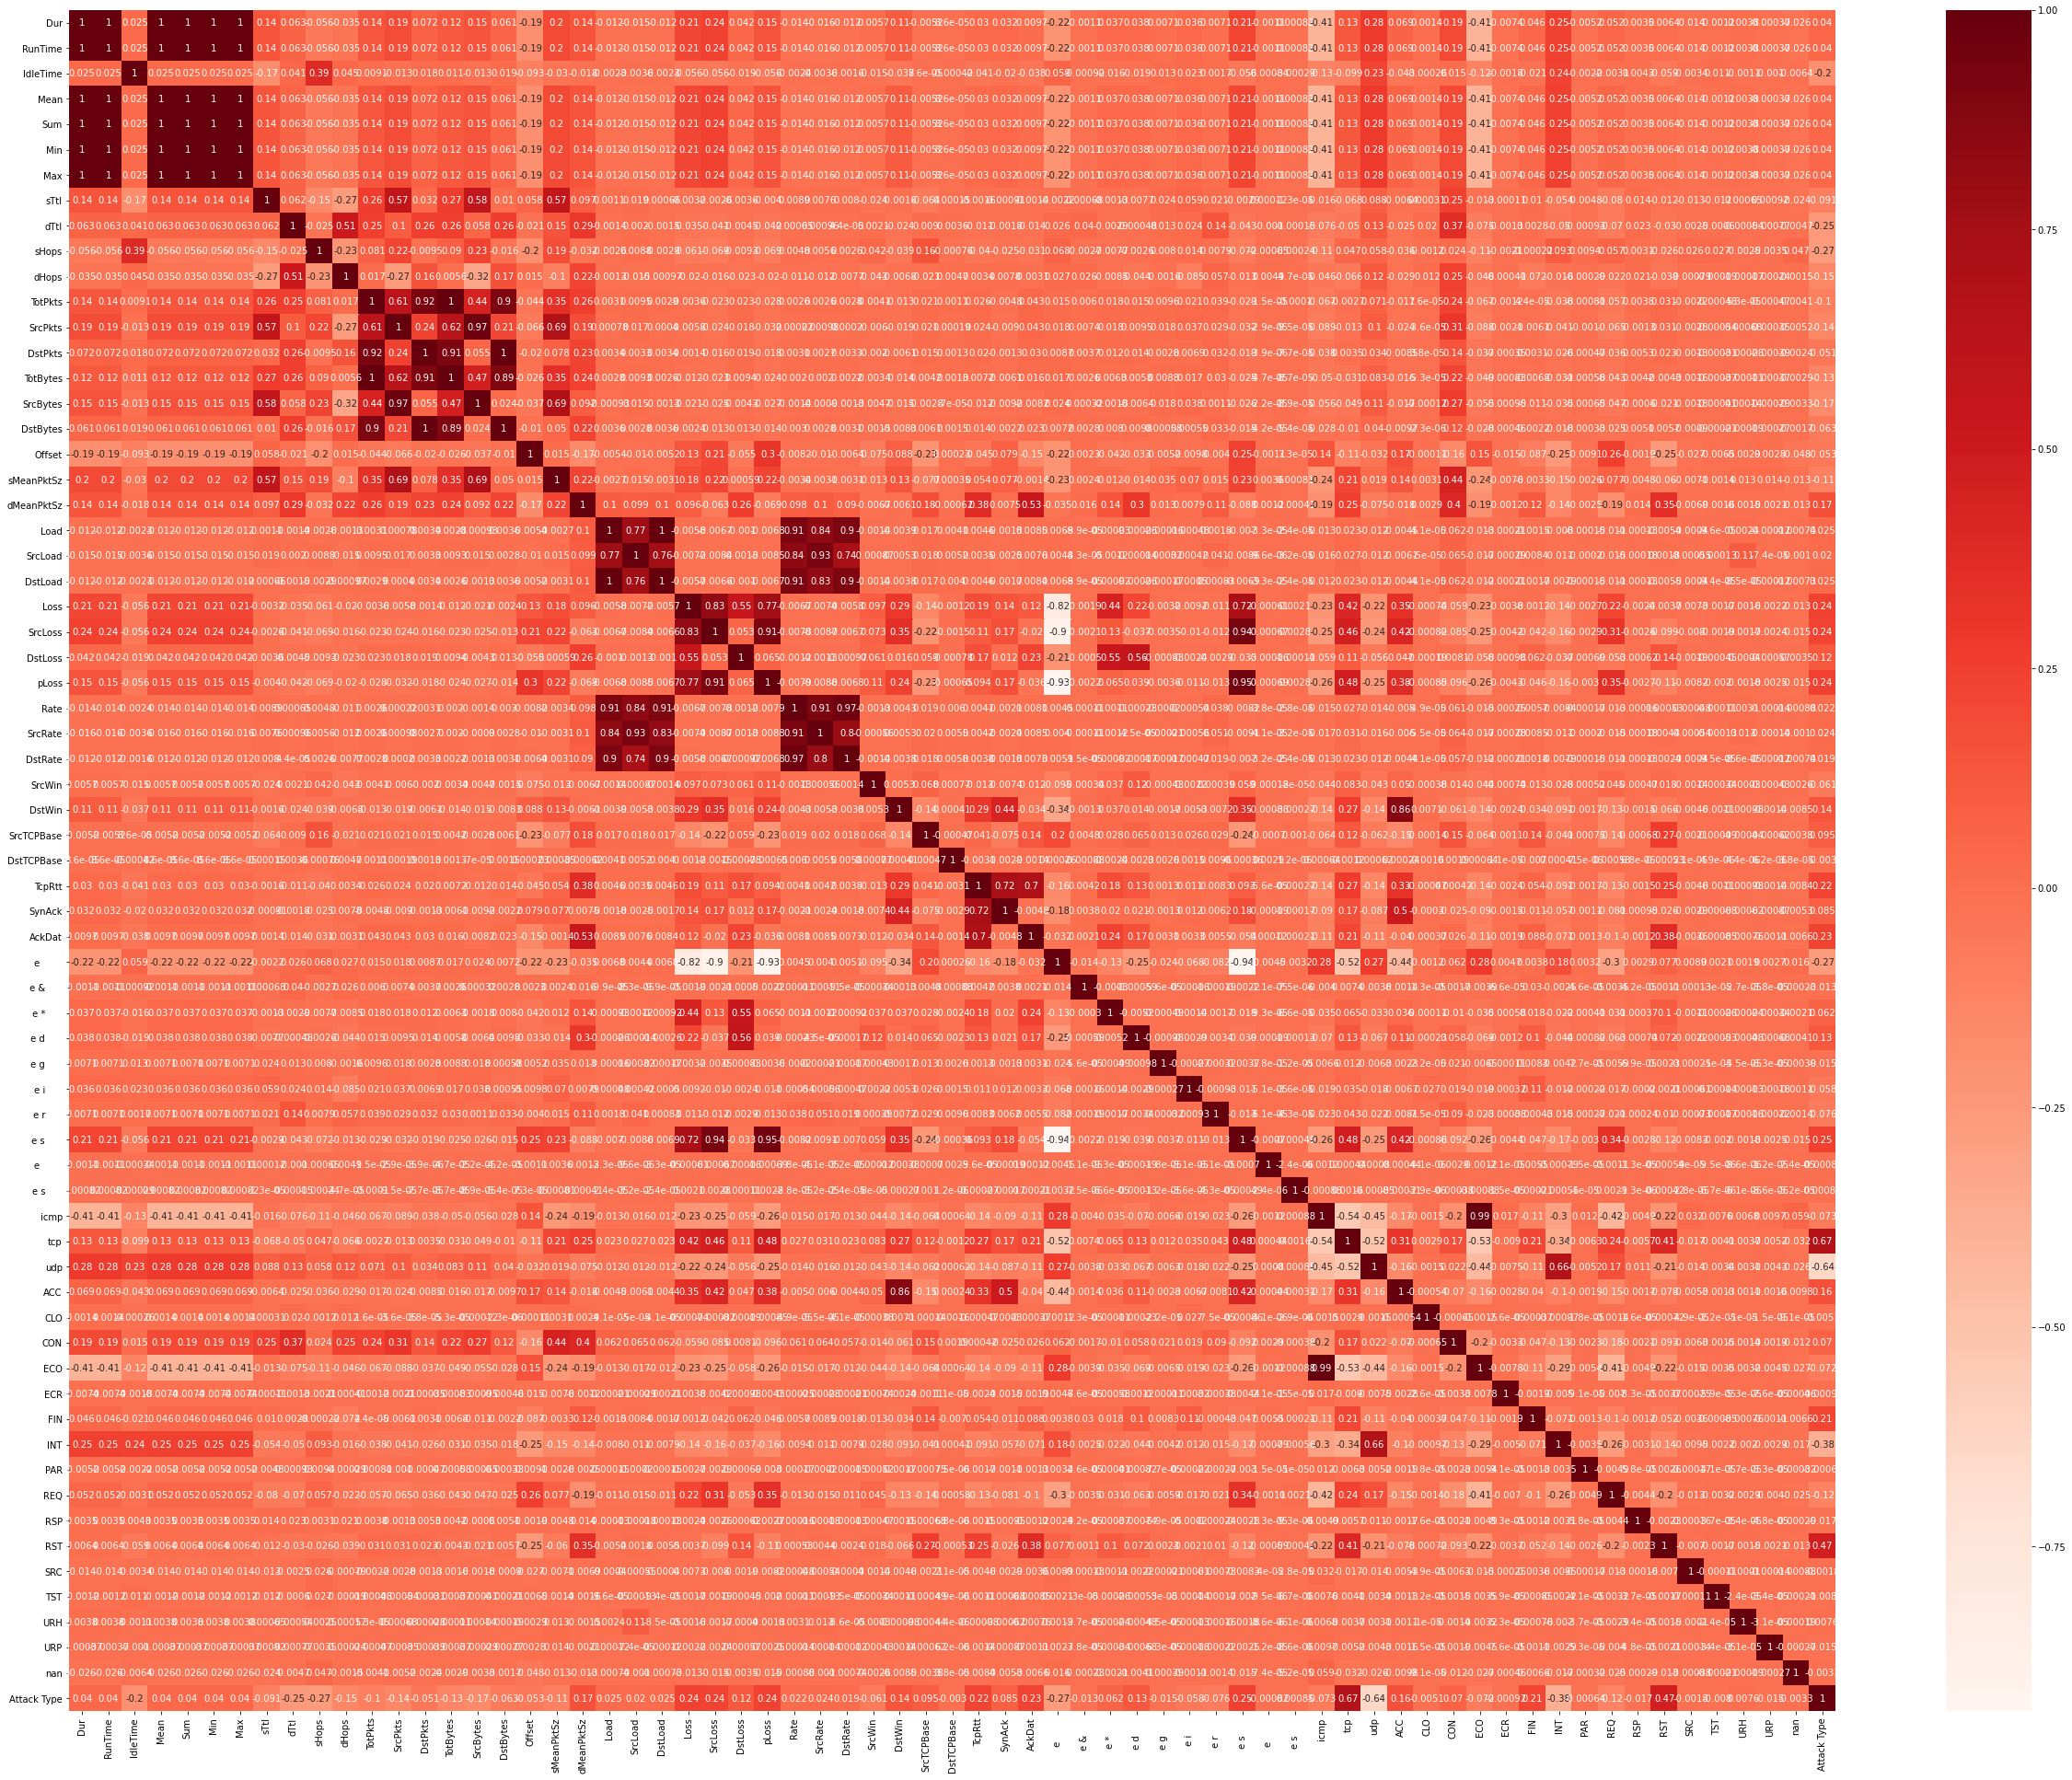

In [10]:
#Using Pearson Correlation
plt.figure(figsize=(43,34))
cor = train_data.corr(method='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if  abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [11]:
corr_features = correlation(train_data, 0.90)
len(set(corr_features))

17

In [12]:
corr_features

{' e        ',
 ' e s      ',
 'DstBytes',
 'DstLoad',
 'DstPkts',
 'DstRate',
 'ECO',
 'Max',
 'Mean',
 'Min',
 'Rate',
 'RunTime',
 'SrcBytes',
 'SrcRate',
 'Sum',
 'TotBytes',
 'pLoss'}

In [13]:
import pandas
pandas.set_option('display.max_rows', None)

In [14]:
top = train_data.corrwith(train_data["Attack Type"])
display(top)

Dur            0.040427
RunTime        0.040427
IdleTime      -0.198134
Mean           0.040427
Sum            0.040427
Min            0.040427
Max            0.040427
sTtl          -0.090589
dTtl          -0.254632
sHops         -0.270401
dHops         -0.149132
TotPkts       -0.100205
SrcPkts       -0.143269
DstPkts       -0.050667
TotBytes      -0.131801
SrcBytes      -0.170545
DstBytes      -0.062966
Offset        -0.052609
sMeanPktSz    -0.107542
dMeanPktSz     0.166248
Load           0.024665
SrcLoad        0.019892
DstLoad        0.024644
Loss           0.241873
SrcLoss        0.235020
DstLoss        0.115615
pLoss          0.242617
Rate           0.021532
SrcRate        0.024373
DstRate        0.019422
SrcWin        -0.060693
DstWin         0.137342
SrcTCPBase     0.095418
DstTCPBase    -0.002969
TcpRtt         0.222615
SynAck         0.084669
AckDat         0.231549
 e            -0.267994
 e &          -0.013261
 e *           0.062180
 e d           0.127613
 e g          -0

In [15]:
top = top.drop([' e        ', 'DstBytes', 'DstLoad', 'DstPkts', 'ECO', 'Max', 'Mean', 'Min', 'RunTime', 'SrcRate', 'Sum', 'pLoss'], axis=0)

In [16]:
display(top)

Dur            0.040427
IdleTime      -0.198134
sTtl          -0.090589
dTtl          -0.254632
sHops         -0.270401
dHops         -0.149132
TotPkts       -0.100205
SrcPkts       -0.143269
TotBytes      -0.131801
SrcBytes      -0.170545
Offset        -0.052609
sMeanPktSz    -0.107542
dMeanPktSz     0.166248
Load           0.024665
SrcLoad        0.019892
Loss           0.241873
SrcLoss        0.235020
DstLoss        0.115615
Rate           0.021532
DstRate        0.019422
SrcWin        -0.060693
DstWin         0.137342
SrcTCPBase     0.095418
DstTCPBase    -0.002969
TcpRtt         0.222615
SynAck         0.084669
AckDat         0.231549
 e &          -0.013261
 e *           0.062180
 e d           0.127613
 e g          -0.014919
 e i          -0.058434
 e r          -0.076001
 e s           0.245781
e             -0.000822
e s            0.000849
icmp          -0.072593
tcp            0.672815
udp           -0.639528
ACC            0.160435
CLO           -0.005136
CON            0

In [17]:
top = top.drop(['Attack Type'], axis=0)
top_abs = top.abs()
display(top_abs)

Dur           0.040427
IdleTime      0.198134
sTtl          0.090589
dTtl          0.254632
sHops         0.270401
dHops         0.149132
TotPkts       0.100205
SrcPkts       0.143269
TotBytes      0.131801
SrcBytes      0.170545
Offset        0.052609
sMeanPktSz    0.107542
dMeanPktSz    0.166248
Load          0.024665
SrcLoad       0.019892
Loss          0.241873
SrcLoss       0.235020
DstLoss       0.115615
Rate          0.021532
DstRate       0.019422
SrcWin        0.060693
DstWin        0.137342
SrcTCPBase    0.095418
DstTCPBase    0.002969
TcpRtt        0.222615
SynAck        0.084669
AckDat        0.231549
 e &          0.013261
 e *          0.062180
 e d          0.127613
 e g          0.014919
 e i          0.058434
 e r          0.076001
 e s          0.245781
e             0.000822
e s           0.000849
icmp          0.072593
tcp           0.672815
udp           0.639528
ACC           0.160435
CLO           0.005136
CON           0.070229
ECR           0.000922
FIN        

In [18]:
top_abs = top_abs.to_frame('Absolute PCC')

In [19]:
top_abs.index.name = 'Features'
display(top_abs)

,Absolute PCC
Features,
Dur,0.040427
IdleTime,0.198134
sTtl,0.090589
dTtl,0.254632
sHops,0.270401
dHops,0.149132
TotPkts,0.100205
SrcPkts,0.143269
TotBytes,0.131801


In [20]:
top_sorted = top.sort_values()
display(top_sorted)

Features
udp          -0.639528
INT          -0.379360
sHops        -0.270401
dTtl         -0.254632
IdleTime     -0.198134
SrcBytes     -0.170545
dHops        -0.149132
SrcPkts      -0.143269
TotBytes     -0.131801
REQ          -0.121778
sMeanPktSz   -0.107542
TotPkts      -0.100205
sTtl         -0.090589
 e r         -0.076001
icmp         -0.072593
SrcWin       -0.060693
 e i         -0.058434
Offset       -0.052609
RSP          -0.016510
URP          -0.015120
 e g         -0.014919
 e &         -0.013261
TST          -0.008047
CLO          -0.005136
nan          -0.003252
DstTCPBase   -0.002969
SRC          -0.001764
ECR          -0.000922
e            -0.000822
PAR          -0.000644
e s           0.000849
URH           0.007558
DstRate       0.019422
SrcLoad       0.019892
Rate          0.021532
Load          0.024665
Dur           0.040427
 e *          0.062180
CON           0.070229
SynAck        0.084669
SrcTCPBase    0.095418
DstLoss       0.115615
 e d          0.127613
Ds

In [21]:
df = df.drop(columns=[' e        ', 'DstBytes', 'pLoss', 'DstLoad','RunTime', 'Mean', 'Sum', 'Min', 'Max','ECO','DstPkts','SrcRate'])

In [22]:
X = df.drop("Attack Type",1)   #Feature Matrix
y = df["Attack Type"] 

In [23]:
from sklearn.feature_selection import SelectKBest, f_classif

In [24]:
selector = SelectKBest(f_classif, k=10).fit(X,y)

selected_features_df = pd.DataFrame({'Features':list(X.columns),'Scores':selector.scores_})
selected_features_df.sort_values(by='Scores', ascending=False)

,Features,Scores
36,icmp,8.791711e+06
37,tcp,2.153011e+06
38,udp,1.683555e+06
33,e s,2.102851e+05
48,RST,2.054376e+05
41,CON,1.683251e+05
16,SrcLoss,1.563239e+05
4,sHops,1.446603e+05
11,sMeanPktSz,1.277760e+05
44,INT,1.158140e+05


In [23]:
#selected_features_df = selected_features_df.drop('Features', axis=1)
df_norm = (selected_features_df.Scores-selected_features_df.Scores.min())/(selected_features_df.Scores.max()-selected_features_df.Scores.min())
df_norm = pd.concat((selected_features_df.Features, df_norm), 1)
 
print("Scaled Dataset Using Pandas")
display(df_norm)

Scaled Dataset Using Pandas


,Features,Scores
0,Dur,8.427850e-09
1,IdleTime,4.153752e-10
2,sTtl,2.360515e-09
3,dTtl,2.997173e-09
4,sHops,3.689460e-08
5,dHops,2.483168e-10
6,TotPkts,4.493885e-07
7,SrcPkts,2.124265e-07
8,TotBytes,8.956791e-04
9,SrcBytes,5.311210e-04


In [28]:
#top_abs.reset_index(drop=True, inplace=True)
#selected_features_df.reset_index(drop=True, inplace=True)

new = pd.merge(top_abs, df_norm, on='Features')
display(new)

,Features,Absolute PCC,Scores
0,Dur,0.040427,8.427850e-09
1,IdleTime,0.198134,4.153752e-10
2,sTtl,0.090589,2.360515e-09
3,dTtl,0.254632,2.997173e-09
4,sHops,0.270401,3.689460e-08
5,dHops,0.149132,2.483168e-10
6,TotPkts,0.100205,4.493885e-07
7,SrcPkts,0.143269,2.124265e-07
8,TotBytes,0.131801,8.956791e-04
9,SrcBytes,0.170545,5.311210e-04


In [29]:
new['Total'] = new['Absolute PCC'] + new['Scores']
display(new)

,Features,Absolute PCC,Scores,Total
0,Dur,0.040427,8.427850e-09,0.040427
1,IdleTime,0.198134,4.153752e-10,0.198134
2,sTtl,0.090589,2.360515e-09,0.090589
3,dTtl,0.254632,2.997173e-09,0.254632
4,sHops,0.270401,3.689460e-08,0.270401
5,dHops,0.149132,2.483168e-10,0.149132
6,TotPkts,0.100205,4.493885e-07,0.100205
7,SrcPkts,0.143269,2.124265e-07,0.143269
8,TotBytes,0.131801,8.956791e-04,0.132697
9,SrcBytes,0.170545,5.311210e-04,0.171077


In [30]:
new.sort_values('Total', ascending=False)

,Features,Absolute PCC,Scores,Total
22,SrcTCPBase,0.095418,1.000000e+00,1.095418
37,tcp,0.672815,7.550484e-09,0.672815
38,udp,0.639528,8.393535e-09,0.639528
48,RST,0.471204,6.983077e-09,0.471204
13,Load,0.024665,4.067659e-01,0.431431
44,INT,0.379360,4.925269e-09,0.379360
4,sHops,0.270401,3.689460e-08,0.270401
3,dTtl,0.254632,2.997173e-09,0.254632
33,e s,0.245781,6.787404e-09,0.245781
15,Loss,0.241873,6.575312e-09,0.241873
